<a href="https://colab.research.google.com/github/sandhyashree123-v/ProgrammingAssignment2/blob/master/Oral_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os


base_path = '/content/drive/MyDrive'

# Recursively search for your dataset files
for root, dirs, files in os.walk(base_path):
    for file in files:
        if 'ANNtrain' in file or 'ANNtest' in file:
            print(os.path.join(root, file))


/content/drive/MyDrive/ANNtest.zip
/content/drive/MyDrive/ANNtrain.zip


In [ ]:
train_zip_path = '/content/drive/MyDrive/ANNtrain.zip'
test_zip_path = '/content/drive/MyDrive/ANNtest.zip'
img_path = '/content/drive/MyDrive/val (1).zip'

import zipfile

# Unzip datasets
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train_data')

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test_data')

with zipfile.ZipFile(img_path, 'r') as zip_ref:
    zip_ref.extractall('/content/val_data')


In [ ]:
import os

print("Contents of /content/train_data:", os.listdir("/content/train_data"))
print("Contents of /content/test_data:", os.listdir("/content/test_data"))


Contents of /content/train_data: ['OSCC', 'Normal']
Contents of /content/test_data: ['OSCC', 'Normal']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = 150  # You can change this to 224 if using pretrained models later
batch_size = 32

# Create generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/test_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important for prediction later
)


Found 4946 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4 convolutional blocks (each with 6 layers)
for _ in range(4):
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

# Fully connected part
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 37, 37, 64)     │             

 Total params: 2,937,345 (11.21 MB)

 Trainable params: 2,935,233 (11.20 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)


Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 76s 486ms/step - accuracy: 0.7117 - loss: 0.5967 - val_accuracy: 0.2460 - val_loss: 1.7709
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 67s 433ms/step - accuracy: 0.7596 - loss: 0.5305 - val_accuracy: 0.3413 - val_loss: 1.4257
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 65s 418ms/step - accuracy: 0.7934 - loss: 0.4526 - val_accuracy: 0.6746 - val_loss: 0.5939
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 64s 412ms/step - accuracy: 0.8034 - loss: 0.4273 - val_accuracy: 0.8095 - val_loss: 0.4270
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 83s 417ms/step - accuracy: 0.8220 - loss: 0.3960 - val_accuracy: 0.8730 - val_loss: 0.3350
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 68s 438ms/step - accuracy: 0.8323 - loss: 0.3676 - val_accuracy: 0.8333 - val_loss: 0.4341
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 68s 439ms/step - accuracy: 0.8419 - loss: 0.3621 - val_accuracy: 0.8651 - val_loss: 0.3575
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 65s 418ms/step - accuracy: 0.8522 - loss: 0

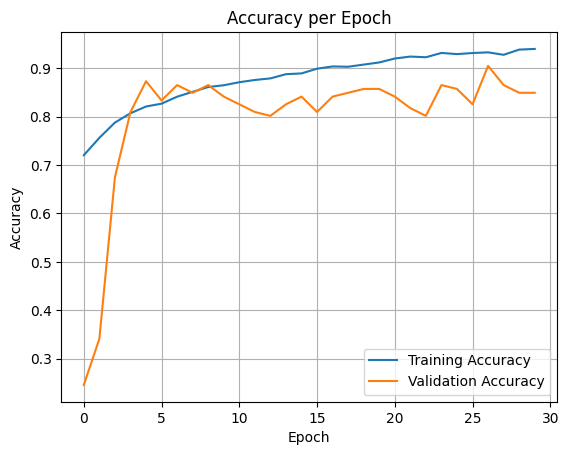

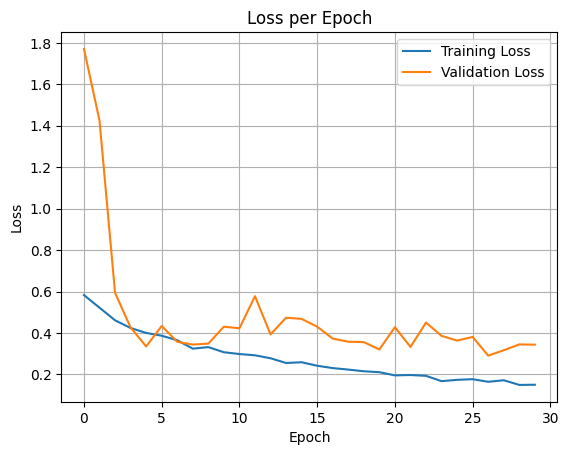

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8272 - loss: 0.3830

Final Test Accuracy: 84.92%
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step

Confusion Matrix:
[[23  8]
 [11 84]]


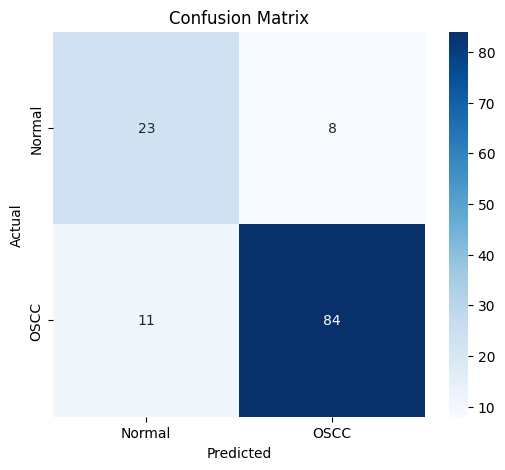


Classification Report:
              precision    recall  f1-score   support

      Normal       0.68      0.74      0.71        31
        OSCC       0.91      0.88      0.90        95

    accuracy                           0.85       126
   macro avg       0.79      0.81      0.80       126
weighted avg       0.85      0.85      0.85       126



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('oral_cancer_detector_model.keras')  # Save model

# Evaluate and print final accuracy + confusion matrix
loss, accuracy = model.evaluate(test_generator)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

# Predict
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)

# Ground truth
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix and Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Now download the model
from google.colab import files
files.download('oral_cancer_detector_model.keras')


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("oral_cancer_detector_model.keras")

# Path to validation data
val_dir = '/content/val_data'  # update if different
classes = ['Normal', 'OSCC']

# Counters
total = 0
correct = 0

# Iterate through each class folder
for class_name in classes:
    class_dir = os.path.join(val_dir, class_name)
    label = 0 if class_name == 'Normal' else 1  # Normal = 0, OSCC = 1

    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, img_name)

            # Load and preprocess image
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Predict
            prediction = model.predict(img_array)[0][0]
            predicted_label = 1 if prediction >= 0.5 else 0

            # Compare
            if predicted_label == label:
                correct += 1
            total += 1

# Print accuracy
accuracy = (correct / total) * 100
print(f"Model Accuracy on validation data: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━

In [ ]:
import time

# Start timer
start_time = time.time()

# Run prediction
y_pred_probs = model.predict(test_generator)

# End timer
end_time = time.time()

# Execution time in seconds and milliseconds
execution_time_sec = end_time - start_time
execution_time_ms = execution_time_sec * 1000

print(f"Execution Time: {execution_time_sec:.4f} seconds")
print(f"Execution Time: {execution_time_ms:.2f} milliseconds")


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Execution Time: 11.3273 seconds
Execution Time: 11327.25 milliseconds


In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    fbeta_score, matthews_corrcoef
)
import numpy as np


In [ ]:
def compute_all_metrics(y_true, y_pred_probs, beta=0.5, threshold=0.5):
    # Convert probabilities to binary predictions
    y_pred = (y_pred_probs >= threshold).astype(int)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    f_beta = fbeta_score(y_true, y_pred, beta=beta)
    specificity = tn / (tn + fp)
    miss_rate = fn / (fn + tp)
    lr_positive = recall / (1 - specificity) if (1 - specificity) != 0 else np.inf
    lr_negative = (1 - recall) / specificity if specificity != 0 else np.inf
    fmi = np.sqrt(precision * recall)  # Fowlkes-Mallows Index

    return {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "F2-score": f2,
        "Fβ-score (β=0.5)": f_beta,
        "Specificity": specificity,
        "Miss Rate": miss_rate,
        "Likelihood Ratio Positive": lr_positive,
        "Likelihood Ratio Negative": lr_negative,
        "Fowlkes-Mallows Index": fmi
    }


In [ ]:
# Get true labels
y_true = test_generator.classes

# Predict probabilities
y_pred_probs = model.predict(test_generator)
if y_pred_probs.shape[1] == 1:  # If single sigmoid output
    y_pred_probs = y_pred_probs.flatten()

# Compute metrics
metrics = compute_all_metrics(y_true, y_pred_probs, beta=0.5)

# Print
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step
Precision: 0.9130
Recall: 0.8842
F1-score: 0.8984
F2-score: 0.8898
Fβ-score (β=0.5): 0.9071
Specificity: 0.7419
Miss Rate: 0.1158
Likelihood Ratio Positive: 3.4263
Likelihood Ratio Negative: 0.1561
Fowlkes-Mallows Index: 0.8985


In [ ]:
lr = model.optimizer.learning_rate.numpy()
print("Learning rate:", lr)


Learning rate: 1e-04


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score
import numpy as np

# Step 1: Predict probabilities and labels on test data
y_probs = model.predict(test_generator)
y_pred = (y_probs > 0.5).astype(int).flatten()  # Convert probs to 0 or 1
y_true = test_generator.classes  # True labels from the generator

# Step 2: Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Step 3: Compute required metrics
auc = roc_auc_score(y_true, y_probs)
sensitivity = recall_score(y_true, y_pred)
ppv = precision_score(y_true, y_pred)  # Positive Predicted Value
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
false_positive_ratio = fp / (fp + tn) if (fp + tn) > 0 else 0
false_negative_ratio = fn / (fn + tp) if (fn + tp) > 0 else 0

# Step 4: Print the results
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Positive Predicted Value (PPV):", ppv)
print("Negative Predicted Value (NPV):", npv)
print("False Positive Ratio (FPR):", false_positive_ratio)
print("False Negative Ratio (FNR):", false_negative_ratio)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
AUC: 0.9246179966044142
Sensitivity (Recall): 0.8842105263157894
Positive Predicted Value (PPV): 0.9130434782608695
Negative Predicted Value (NPV): 0.6764705882352942
False Positive Ratio (FPR): 0.25806451612903225
False Negative Ratio (FNR): 0.11578947368421053


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os


base_path = '/content/drive/MyDrive'

# Recursively search for your dataset files
for root, dirs, files in os.walk(base_path):
    for file in files:
        if 'ANNtrain' in file or 'ANNtest' in file:
            print(os.path.join(root, file))
train_zip_path = '/content/drive/MyDrive/ANNtrain.zip'
test_zip_path = '/content/drive/MyDrive/ANNtest.zip'
img_path = '/content/drive/MyDrive/val (1).zip'

import zipfile

# Unzip datasets
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train_data')

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test_data')

with zipfile.ZipFile(img_path, 'r') as zip_ref:
    zip_ref.extractall('/content/val_data')
import os

print("Contents of /content/train_data:", os.listdir("/content/train_data"))
print("Contents of /content/test_data:", os.listdir("/content/test_data"))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = 150  # You can change this to 224 if using pretrained models later
batch_size = 32

# Create generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/test_data',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important for prediction later
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4 convolutional blocks (each with 6 layers)
for _ in range(4):
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

# Fully connected part
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

model.save('oral_cancer_detector_model.keras')  # Save model

# Evaluate and print final accuracy + confusion matrix
loss, accuracy = model.evaluate(test_generator)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

# Predict
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)

# Ground truth
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix and Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Now download the model
from google.colab import files
files.download('oral_cancer_detector_model.keras')

import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("oral_cancer_detector_model.keras")

# Path to validation data
val_dir = '/content/val_data'  # update if different
classes = ['Normal', 'OSCC']

# Counters
total = 0
correct = 0

# Iterate through each class folder
for class_name in classes:
    class_dir = os.path.join(val_dir, class_name)
    label = 0 if class_name == 'Normal' else 1  # Normal = 0, OSCC = 1

    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, img_name)

            # Load and preprocess image
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Predict
            prediction = model.predict(img_array)[0][0]
            predicted_label = 1 if prediction >= 0.5 else 0

            # Compare
            if predicted_label == label:
                correct += 1
            total += 1

# Print accuracy
accuracy = (correct / total) * 100
print(f"Model Accuracy on validation data: {accuracy:.2f}%")

import time

# Start timer
start_time = time.time()

# Run prediction
y_pred_probs = model.predict(test_generator)

# End timer
end_time = time.time()

# Execution time in seconds and milliseconds
execution_time_sec = end_time - start_time
execution_time_ms = execution_time_sec * 1000

print(f"Execution Time: {execution_time_sec:.4f} seconds")
print(f"Execution Time: {execution_time_ms:.2f} milliseconds")

from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    fbeta_score, matthews_corrcoef
)
import numpy as np

def compute_all_metrics(y_true, y_pred_probs, beta=0.5, threshold=0.5):
    # Convert probabilities to binary predictions
    y_pred = (y_pred_probs >= threshold).astype(int)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    f_beta = fbeta_score(y_true, y_pred, beta=beta)
    specificity = tn / (tn + fp)
    miss_rate = fn / (fn + tp)
    lr_positive = recall / (1 - specificity) if (1 - specificity) != 0 else np.inf
    lr_negative = (1 - recall) / specificity if specificity != 0 else np.inf
    fmi = np.sqrt(precision * recall)  # Fowlkes-Mallows Index

    return {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "F2-score": f2,
        "Fβ-score (β=0.5)": f_beta,
        "Specificity": specificity,
        "Miss Rate": miss_rate,
        "Likelihood Ratio Positive": lr_positive,
        "Likelihood Ratio Negative": lr_negative,
        "Fowlkes-Mallows Index": fmi
    }

# Get true labels
y_true = test_generator.classes

# Predict probabilities
y_pred_probs = model.predict(test_generator)
if y_pred_probs.shape[1] == 1:  # If single sigmoid output
    y_pred_probs = y_pred_probs.flatten()

# Compute metrics
metrics = compute_all_metrics(y_true, y_pred_probs, beta=0.5)

# Print
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")
lr = model.optimizer.learning_rate.numpy()
print("Learning rate:", lr)
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score
import numpy as np

# Step 1: Predict probabilities and labels on test data
y_probs = model.predict(test_generator)
y_pred = (y_probs > 0.5).astype(int).flatten()  # Convert probs to 0 or 1
y_true = test_generator.classes  # True labels from the generator

# Step 2: Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Step 3: Compute required metrics
auc = roc_auc_score(y_true, y_probs)
sensitivity = recall_score(y_true, y_pred)
ppv = precision_score(y_true, y_pred)  # Positive Predicted Value
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
false_positive_ratio = fp / (fp + tn) if (fp + tn) > 0 else 0
false_negative_ratio = fn / (fn + tp) if (fn + tp) > 0 else 0

# Step 4: Print the results
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Positive Predicted Value (PPV):", ppv)
print("Negative Predicted Value (NPV):", npv)
print("False Positive Ratio (FPR):", false_positive_ratio)
print("False Negative Ratio (FNR):", false_negative_ratio)
